In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# load dataset
df = pd.read_csv("HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [23]:
df.drop(columns="Index", axis=1, inplace=True)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [25]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


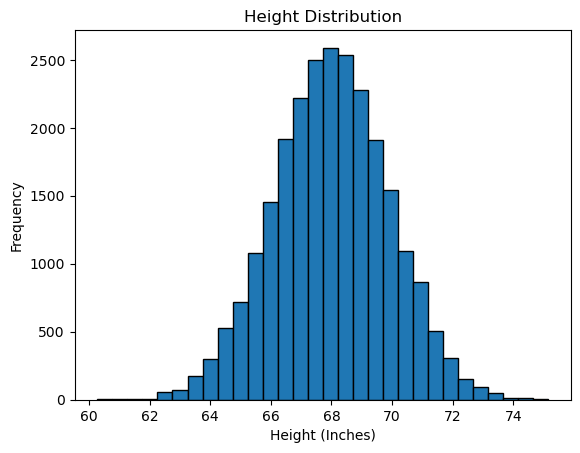

In [33]:
# Plot Height distribution
df["Height(Inches)"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Height Distribution")
plt.xlabel("Height (Inches)")
plt.ylabel("Frequency")
plt.show()

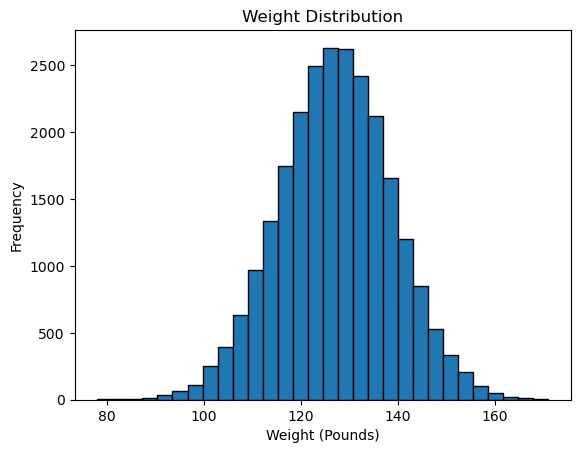

In [32]:
# Plot Weight distribution
df["Weight(Pounds)"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Weight Distribution")
plt.xlabel("Weight (Pounds)")
plt.ylabel("Frequency")
plt.show()

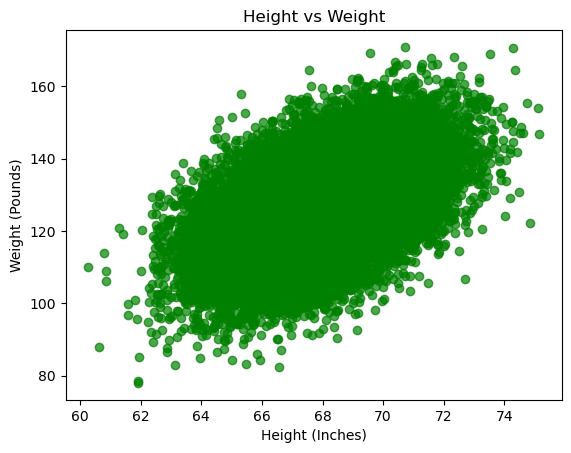

In [38]:
# Scatter plot to visualize the relationship between Height and Weight
plt.scatter(df["Height(Inches)"], df["Weight(Pounds)"], color="green", alpha=0.7)
plt.title("Height vs Weight")
plt.xlabel("Height (Inches)")
plt.ylabel("Weight (Pounds)")
plt.show()

In [41]:
# Correlation between Height and Weight
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


In [42]:
# Correlation between Height and Weight
correlation = df["Height(Inches)"].corr(df["Weight(Pounds)"])
print(f"\nCorrelation between Height and Weight: {correlation:.4f}")


Correlation between Height and Weight: 0.5029


Text(0.5, 1.0, 'Height Boxplot')

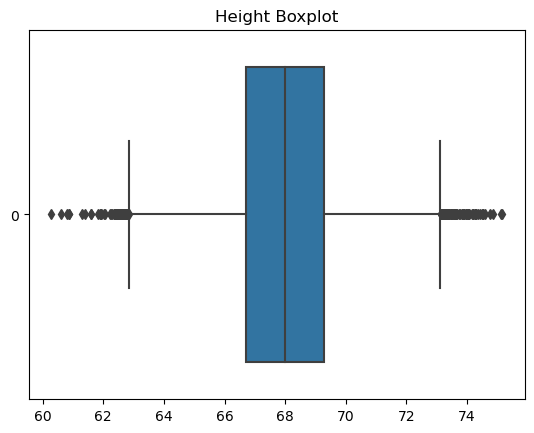

In [66]:
# Outlier Detection using boxplots
sns.boxplot(df["Height(Inches)"], orient="h")
plt.title("Height Boxplot")

Text(0.5, 1.0, 'Weight Boxplot')

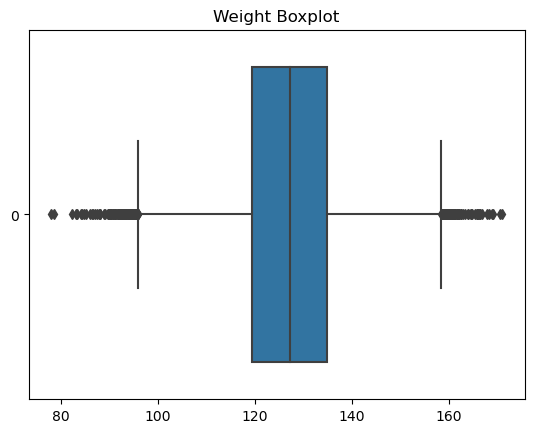

In [50]:
sns.boxplot(df["Weight(Pounds)"], orient="h")
plt.title("Weight Boxplot")

In [58]:
# Statistical Methods to Detect Outliers
from scipy.stats import zscore

# calculate z-scores
df['Height_z'] = zscore(df['Height(Inches)'])
df['Weight_z'] = zscore(df['Weight(Pounds)'])

# Identify outliers (Z-score > 3 or < -3)
height_outliers = df[df['Height_z'].abs() > 3]
weight_outliers = df[df['Weight_z'].abs() > 3]

print("Height Outliers:")
print(height_outliers)

Height Outliers:
       Height(Inches)  Weight(Pounds)  Height_z  Weight_z
138          73.90107       151.39130  3.106768  2.084948
174          73.83364       139.29830  3.071309  1.047872
412          62.01666       109.08480 -3.142788 -1.543190
1162         74.24899       150.21670  3.289726  1.984216
1383         74.19488       129.05970  3.261271  0.169826
1893         75.15280       146.97010  3.765005  1.705793
2395         73.99549       142.90160  3.156420  1.356885
2481         75.11519       153.95620  3.745227  2.304910
2651         60.61265        88.04646 -3.881103 -3.347405
3696         61.89340        95.74545 -3.207606 -2.687151
4191         74.03777       139.59530  3.178653  1.073342
4508         74.28376       147.78770  3.308010  1.775909
5641         60.86340       106.19390 -3.749243 -1.791109
6405         62.23548        94.80998 -3.027719 -2.767376
6481         61.59011        99.81074 -3.367094 -2.338519
6627         73.72628       142.81100  3.014853  1.3491

In [59]:
print("Weight Outliers:")
print(weight_outliers)

Weight Outliers:
       Height(Inches)  Weight(Pounds)  Height_z  Weight_z
249          65.93895        84.35980 -1.080206 -3.663567
367          72.32489       168.22900  2.277915  3.528922
446          69.16807       162.41090  0.617865  3.029971
727          63.12550        83.08527 -2.559691 -3.772868
1332         72.52115       162.87370  2.381121  3.069660
...               ...             ...       ...       ...
21101        65.84174        85.98927 -1.131325 -3.523826
22282        64.14250        91.37972 -2.024890 -3.061550
22738        62.87593        87.80417 -2.690931 -3.368183
22945        61.92639        78.01476 -3.190257 -4.207707
24610        66.56804        82.38298 -0.749392 -3.833096

[69 rows x 4 columns]


In [63]:
# IQR (Interquartile Range)
Q1_height = df['Height(Inches)'].quantile(0.25)
Q3_height = df['Height(Inches)'].quantile(0.75)
IQR_height = Q3_height - Q1_height

Q1_weight = df['Weight(Pounds)'].quantile(0.25)
Q3_weight = df['Weight(Pounds)'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# Define outlier bounds
lower_bound_height  = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# Identify outliers based on IQR
outliers_height = df[(df['Height(Inches)'] < lower_bound_height) | (df['Height(Inches)'] > upper_bound_height)]
outliers_weight = df[(df['Weight(Pounds)'] < lower_bound_weight) | (df['Weight(Pounds)'] > upper_bound_weight)]


print("Height Outliers based on IQR:")
print(outliers_height)

Height Outliers based on IQR:
       Height(Inches)  Weight(Pounds)  Height_z  Weight_z
138          73.90107        151.3913  3.106768  2.084948
174          73.83364        139.2983  3.071309  1.047872
269          73.26872        130.2636  2.774239  0.273070
412          62.01666        109.0848 -3.142788 -1.543190
1133         62.75039        114.4900 -2.756947 -1.079649
...               ...             ...       ...       ...
23896        73.38057        154.3189  2.833057  2.336014
24078        73.22107        136.7360  2.749182  0.828133
24244        62.26498        104.1348 -3.012206 -1.967694
24475        62.68591        118.6002 -2.790855 -0.727165
24801        74.53177        148.9104  3.438429  1.872190

[167 rows x 4 columns]


In [64]:
print("Weight Outliers based on IQR:")
print(outliers_weight)

Weight Outliers based on IQR:
       Height(Inches)  Weight(Pounds)  Height_z  Weight_z
156          70.98112       158.95620  1.571278  2.733702
249          65.93895        84.35980 -1.080206 -3.663567
293          69.13438        92.74955  0.600148 -2.944075
367          72.32489       168.22900  2.277915  3.528922
446          69.16807       162.41090  0.617865  3.029971
...               ...             ...       ...       ...
24187        69.21155       161.85040  0.640729  2.981904
24610        66.56804        82.38298 -0.749392 -3.833096
24750        70.82192       159.63440  1.487561  2.791863
24835        65.17339        94.40946 -1.482785 -2.801724
24889        71.01048       161.85320  1.586717  2.982144

[191 rows x 4 columns]


In [67]:
# Handling Outliers
# Removing outliers based on IQR
df_no_outliers = df[(df['Height(Inches)'] >= lower_bound_height) & (df['Height(Inches)'] <= upper_bound_height) &
                    (df['Weight(Pounds)'] >= lower_bound_weight) & (df['Weight(Pounds)'] <= upper_bound_weight)]


In [68]:
df_no_outliers

,Height(Inches),Weight(Pounds),Height_z,Weight_z
0,65.78331,112.9925,-1.162051,-1.208072
1,71.51521,136.4873,1.852136,0.806805
2,69.39874,153.0269,0.739165,2.225214
3,68.21660,142.3354,0.117523,1.308328
4,67.78781,144.2971,-0.107961,1.476561
...,...,...,...,...
24995,69.50215,118.0312,0.793544,-0.775961
24996,64.54826,120.1932,-1.811517,-0.590551
24997,64.69855,118.2655,-1.732485,-0.755868
24998,67.52918,132.2682,-0.243965,0.444981


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
# Z-score Standardization
scaler_standard = StandardScaler()
df[['Height(Inches)', 'Weight(Pounds)']] = scaler_standard.fit_transform(df[['Height(Inches)', 'Weight(Pounds)']])

In [110]:
df[['Height(Inches)', 'Weight(Pounds)']]

,Height(Inches),Weight(Pounds)
0,-1.162051,-1.208072
1,1.852136,0.806805
2,0.739165,2.225214
3,0.117523,1.308328
4,-0.107961,1.476561
...,...,...
24995,0.793544,-0.775961
24996,-1.811517,-0.590551
24997,-1.732485,-0.755868
24998,-0.243965,0.444981


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [112]:
X = df[["Height(Inches)"]]
y = df["Weight(Pounds)"]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [114]:
model = LinearRegression()

In [115]:
model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test)
y_pred

array([ 0.11258759, -0.0264802 , -0.08902962, ...,  0.32909061,
       -0.90077302, -1.17127599])

In [117]:
r2 = r2_score(y_test, y_pred)
r2

0.2593047494927634

In [118]:
# Adj r2 score
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"r2 : {r2:.4f}")
print(f"Adjusted r2 : {adjusted_r2:.4f}")

r2 : 0.2593
Adjusted r2 : 0.2592


In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [120]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [121]:
# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 0.6896
Mean Squared Error (MSE): 0.7527
Root Mean Squared Error (RMSE): 0.8676
